# DNA methylation measurement

Piero Palacios Bernuy

## Data Analysis and Integration

### General Idea for Inference for DNA Methylation

The functional model:

$$
Y_{ij} = \beta_{O}(l_{j}) + X_{i}*\beta_{1}(l_j) + \epsilon_{ij}
$$

$X_{i}$ can be a continuous variable like age or weight.

The analysis is modularized:

-   First estimate the betas for every location.
-   Then we make an analysis on those betas.
-   Then we need to identify possible differentially methylated regions (bumps), e.g. using a threshold.
-   We can summarise this bumps using the area or some similar measure.
-   Another summary is to keep the length of the bump and the height.

In [ ]:
library(minfi)

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: S4Vectors


Attaching package: 'S4Vectors'

The following object is masked from 'package:utils':

    findMatches

The following objects are masked from 'package:base':

    expand.grid, I, unname

Loading required package: IRanges


Attaching package: 'IRanges'

The following object is masked from 'package:grDevices':

    windows

Loading required package: GenomeInfoDb

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: 'MatrixGenerics'

The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSds, rowSums2, rowTabulates, rowVarDiffs, rowVars,
    rowWeightedMads, rowWeightedMeans, rowWeightedMedians,
    rowWeightedSds, rowWeig

Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Attaching package: 'Biobase'

The following object is masked from 'package:MatrixGenerics':

    rowMedians

The following objects are masked from 'package:matrixStats':

    anyMissing, rowMedians

Loading required package: Biostrings

Loading required package: XVector


Attaching package: 'Biostrings'

The following object is masked from 'package:base':

    strsplit

Loading required package: bumphunter

Loading required package: foreach

Loading required package: iterators

Loading required package: parallel

Loading required package: locfit

locfit 1.5-9.8   2023-06-11

Setting options('download.file.method.GEOquery'='auto')

Setting options('GEOquery.inmemory.gpl'=FALSE)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::%within%() masks IRanges::%within%()
✖ purrr::accumulate()   masks foreach::accumulate()
✖ dplyr::collapse()     masks Biostrings::collapse(), IRanges::collapse()
✖ dplyr::combine()      masks minfi::combine(), Biobase::combine(), BiocGenerics::combine()
✖ purrr::compact()      masks XVector::compact()
✖ dplyr::count()        masks matrixStats::count()
✖ dplyr::desc()         masks IRanges::desc()
✖ tidyr::expand()       masks S4Vectors::expand()
✖ dplyr::filter()       masks stats::filter()
✖ dplyr::first()        masks S4Vectors::first()
✖ dplyr::lag()          masks stats::lag()
✖ purrr::none()         masks locfit::none()
✖ ggplot2::Position()   masks BiocGenerics::Position(), base::Position()
✖ purrr::reduce()       masks GenomicRanges::reduce(), IRanges::reduce()
✖ dplyr::rename()       masks S4Vectors::rename()
✖ lubridate::second()   masks S4Vectors::second()
✖ lubridate::second<-() ma

In [ ]:
targets <- read.csv("targets.txt", sep = "\t")

``` r

# This code is not executed due to limit size (50 mb) of github
# Please load the 450karrar_processed.rds data that is the resulto of this code
# If you want to do this with the original data, you can find this data on: 
# https://github.com/genomicsclass/tcgaMethylationSubset


targets$Basename <- paste0(getwd(),"/notebooks/", targets$Basename)

dat <- read.metharray(targets$Basename, verbose = T)

pData(dat) <- as(targets, "DataFrame")

## preprocessing

dat <- preprocessIllumina(dat)
dat <- mapToGenome(dat)
dat <- ratioConvert(dat, type="Ilumina")


index_tissue = which(pData(dat)$Tissue != "breast")
dat <- dat[,index_tissue]

index_chr = which(seqnames(dat)=="chr22")

dat <- dat[index_chr,]
```

In [ ]:
dat <- readRDS(file = "450karray_processed.rds")

X <- model.matrix(~pData(dat)$Tissue)

library(doParallel)
detectCores()

[1] 8

[bumphunterEngine] Parallelizing using 8 workers/cores (backend: doParallelSNOW, version: 1.0.17).

[bumphunterEngine] Computing coefficients.

[bumphunterEngine] Performing 1000 permutations.

[bumphunterEngine] Computing marginal permutation p-values.

[bumphunterEngine] cutoff: 0.1

[bumphunterEngine] Finding regions.

Warning in regionFinder(x = beta, chr = chr, pos = pos, cluster = cluster, :
NAs found and removed. ind changed.

[bumphunterEngine] Found 1199 bumps.

[bumphunterEngine] Computing regions for each permutation.

[bumphunterEngine] Estimating p-values and FWER.

### CpG Island Shores

In [ ]:
library(AnnotationHub)

Loading required package: BiocFileCache

Loading required package: dbplyr


Attaching package: 'dbplyr'

The following objects are masked from 'package:dplyr':

    ident, sql


Attaching package: 'AnnotationHub'

The following object is masked from 'package:Biobase':

    cache

loading from cache

In [ ]:
# remember that this is only the chromosome 22

tab <- res$table[res$table$fwer <= 0.05, ]
tab <- makeGRangesFromDataFrame(tab, keep.extra.columns = TRUE)

tab

GRanges object with 321 ranges and 11 metadata columns:
       seqnames            ranges strand |     value      area   cluster
          <Rle>         <IRanges>  <Rle> | <numeric> <numeric> <numeric>
  1021    chr22 30476089-30476525      * | -0.296775   3.26452      1237
  1124    chr22 45404910-45406545      * | -0.156597   2.50556      2673
  1125    chr22 45608345-45608713      * | -0.225305   2.25305      2687
   693    chr22 44568387-44568913      * |  0.246873   2.22186      2606
   729    chr22 45704675-45705042      * |  0.271705   1.90193      2707
   ...      ...               ...    ... .       ...       ...       ...
   983    chr22 23196862-23196971      * | -0.161361  0.322723       713
   627    chr22          42677969      * |  0.217355  0.217355      2416
   742    chr22          46326026      * |  0.217008  0.217008      2752
   844    chr22          50146261      * |  0.216664  0.216664      3154
   462    chr22          37908796      * |  0.216282  0.216282      

In [ ]:
map = distanceToNearest(tab, cgi)

distances <- mcols(map)$distance

cut(distances, c(0,1,2000,5000,Inf), include.lowest = TRUE, right = F) |> 
    table() |> 
    prop.table()


        [0,1)     [1,2e+03) [2e+03,5e+03)   [5e+03,Inf] 
    0.2928349     0.2959502     0.1869159     0.2242991 

With matplot:

Warning in matplot(pos, y, col = as.numeric(cols), xlim = xlim, ylim = c(0, :
default 'pch' is smaller than number of columns and hence recycled

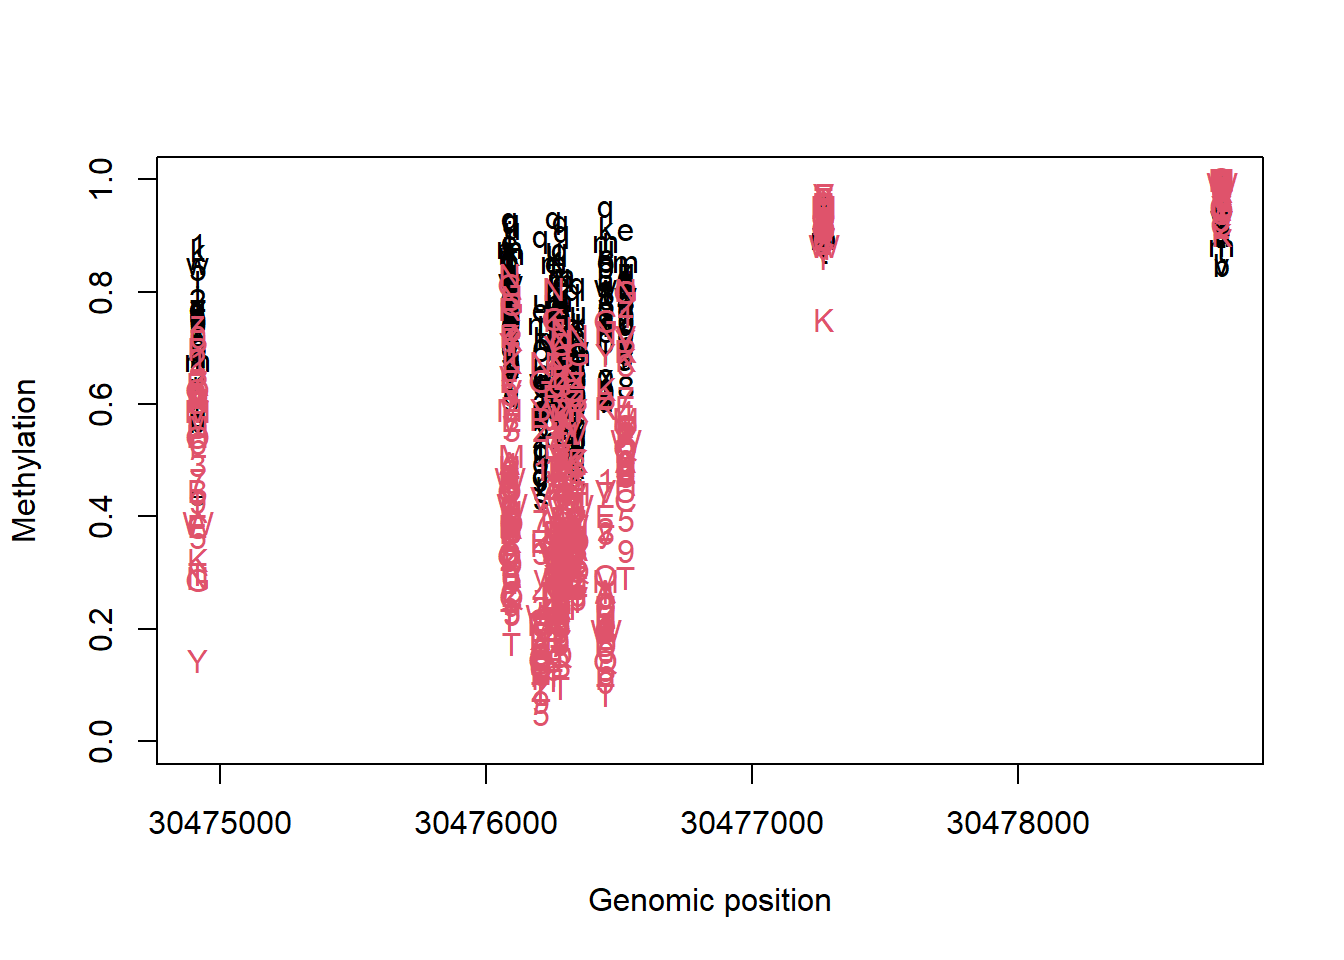

In [ ]:
tab <- tab[order(mcols(tab)$area, decreasing = T)]

tab <- tab+3000

i = 1

data_index <- which(granges(dat) %over% tab[i,])
cgi_index <- which(cgi %over% tab[i,])
the_cgi <- cgi[cgi_index]


pos <- start(dat)[data_index]
xlim <- range(c(pos, start(the_cgi), end(the_cgi)))

beta <- getBeta(dat)
y <- beta[data_index,]

cols <- as.factor(pData(dat)$Tissue)
library(rafalib)

matplot(pos,y, col=as.numeric(cols), xlim=xlim, ylim = c(0,1),
        ylab="Methylation",xlab="Genomic position")

With ggplot2

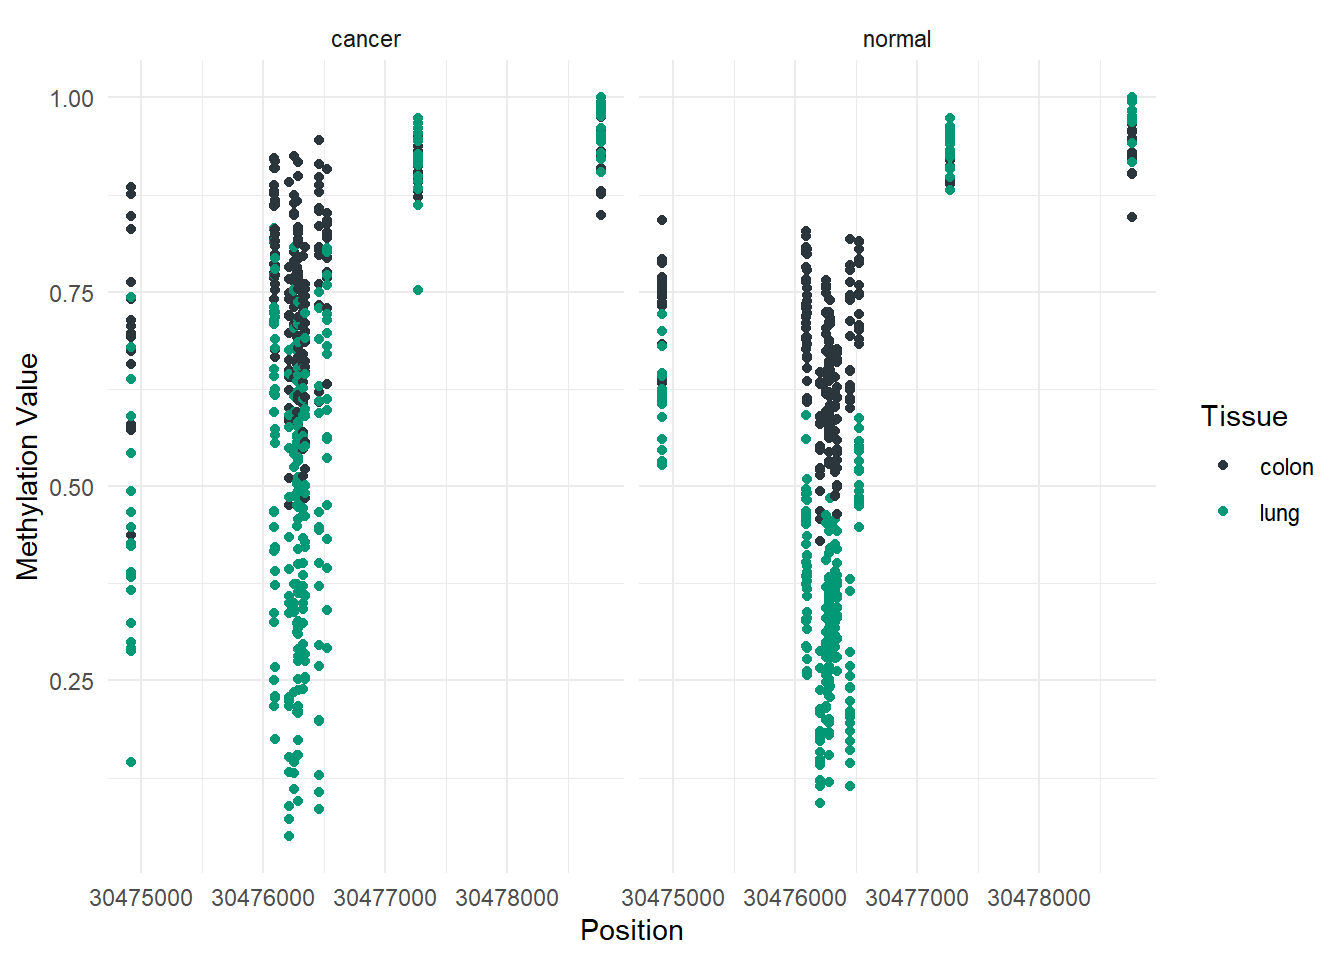

In [ ]:
#| label: fig-meth

dd <- pData(dat) |> 
  as.data.frame() |> 
  as_tibble() |> 
  dplyr::select(Sex,Tissue,Status,bcr_sample_barcode)

d <- y |> 
  as.data.frame() |> 
  as_tibble() |> 
  mutate(CpGs = rownames(y))

colnames(d)[1:(length(colnames(d))-1)] <- dd$bcr_sample_barcode

d <- d |> 
  pivot_longer(cols = colnames(d)[1:(length(colnames(d))-1)], names_to = "sample_names", values_to = "methylation_values")

d <- d |> 
  left_join(dd, by = join_by(sample_names == bcr_sample_barcode))

pos <- granges(dat) |> 
  as.data.frame() 

pos2 <- pos |> 
  as_tibble() |> 
  mutate(CpGs = rownames(pos)) |> 
  dplyr::select(start, CpGs)

d <- d |> 
  left_join(pos2, by = join_by(CpGs))

p1 <- d |> 
  ggplot(aes(start, methylation_values, colour=Tissue)) + 
  geom_point() +
  facet_wrap(~Status) +
  theme_minimal() +
  labs(x = "Position", y="Methylation Value") +
  paletteer::scale_color_paletteer_d("awtools::a_palette")

p1

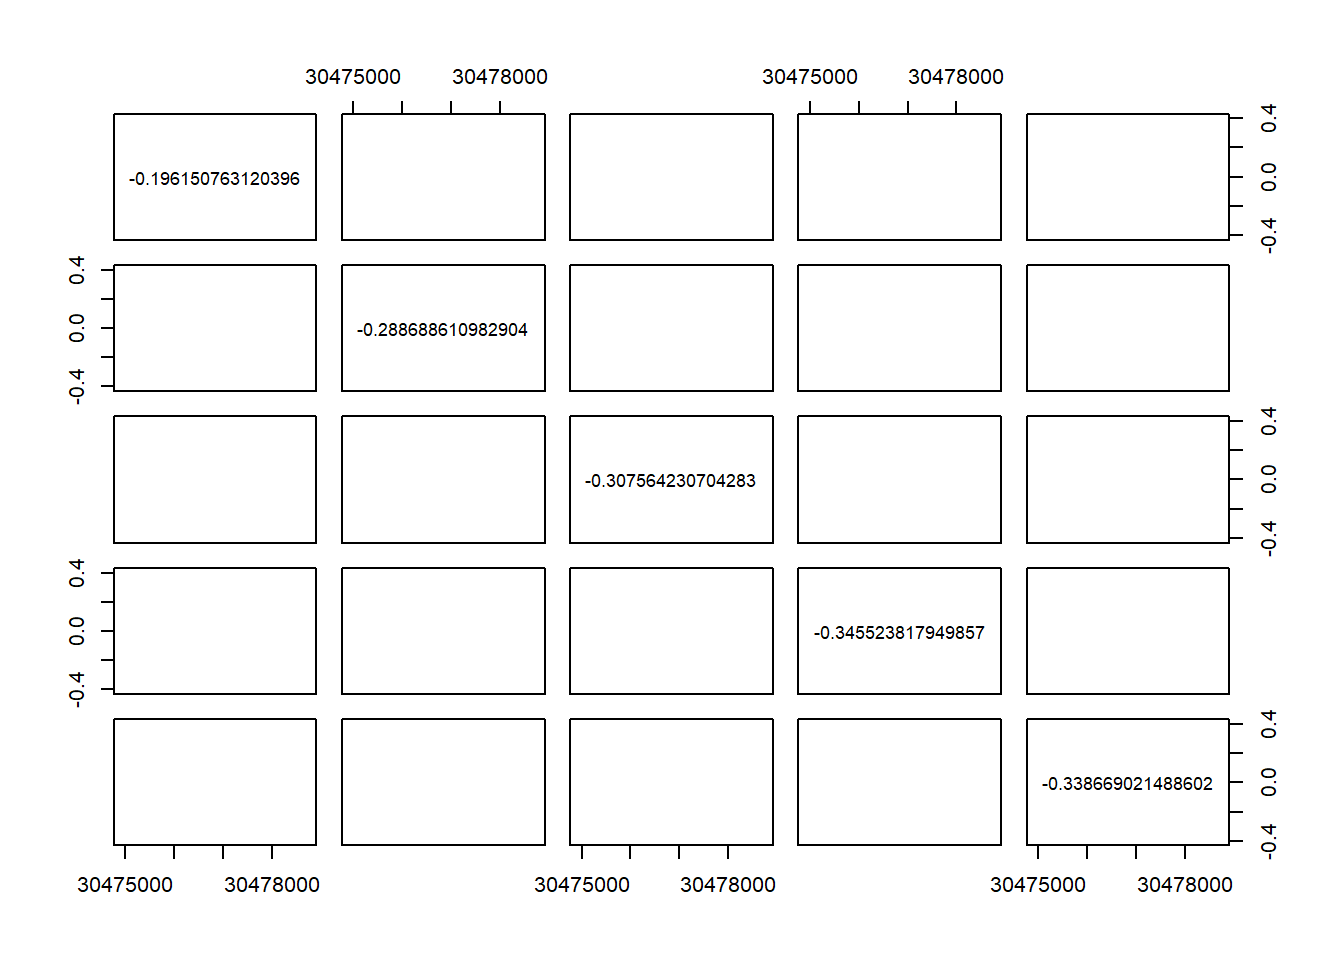

In [ ]:
plot(pos, res$fitted[data_index], xlim=xlim, ylim=c(-0.4,0.4))
abline(h=0)